## Uncertainty

In the current implementation for each query-document pair T-PGN generates a comma separated list of word-level uncertainties. In this notebook we calculate some aggregations to estimate the query-level uncertainty and arrange the result for using with Choppy (https://dl.acm.org/doi/10.1145/3397271.3401188) cut-off predictor;

Formatting uncertainty-related files from:

/**query_id**/ /**doc_id**/ /**rel**/ /**uncertainty_by_query_word** (comma sep. list)/

to TREC-19 format (space-separated):

/**query_id**/ /**"Q0"**/ /**doc_id**/ /**rank**/ /**rel**/ /**uncertainty_Q_D_1**/ /**uncertainty_Q_D_2**/ **...**

//https://microsoft.github.io/msmarco/TREC-Deep-Learning-2019.html

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import argparse
import os
import sys
sys.path.append('../')

from scipy.stats import entropy
from scipy import stats

import ast

### List of folders:

#### All finished generative experiments:
`"<...>/msmarco-passage/generative"`

##### Common Uncertainty File name (in every respective run folder):
`
 UN-TREC-19-test-uncertainty.txt
`

#### Example run folder names:
##### BERT2Transf Tiny:
`YYYY-MM-DD_TTTTTT.TT_bert2t#tiny_tiny_negl`
##### BERT2Transf Mini:
`YYYY-MM-DD_TTTTTT.TT_bert2t#mini_mini_negl`

##### T-PGN Tiny:
`YYYY-MM-DD_TTTTTT.TT_T-PGN_tiny_negl`
##### T-PGN Mini:
`YYYY-MM-DD_TTTTTT.TT_T-PGN_mini_negl`

## Instructions
* fill in the variables with paths and names of your data (see examples below):


`_base_folder = ...`

`_run_folder = ...`

`_uncertainty_file = ... <output of dense retrieval, file [..-test-uncertainty.txt] >`

`_collection = ...`

`_model = ...`

`_filepath = "%s/%s/%s" % (_base_folder, _run_folder, _uncertainty_file)`
* go to "pandas straight away" section below;
* run all cells from then on;
* adjust the saving path in the last cell;

In [2]:
_base_folder = "<...>/msmarco-passage/generative"
_run_folder = "2020-09-24_181431.77_T-PGN_tiny_negl"
_uncertainty_file = 'UN-TREC-19-NUCL-test-uncertainty.txt'
_collection = "trec"
_model = "tpgn_tiny"


_filepath = "%s/%s/%s" % (_base_folder, _run_folder, _uncertainty_file)

# Query-Level Uncertainty
## Reading the word-level uncertainty

In [3]:
ddff = pd.read_csv(_filepath, sep='\t') 
ddff

,q_id,doc_id,rel,uncertainty
0,494835,7130104,-21.467670,"2.8776955604553223,3.3690741062164307,0.385758..."
1,494835,7132810,-9.772815,"2.457479476928711,2.7694661617279053,0.4123201..."
2,494835,8004107,-20.929945,"2.755424737930298,2.316581964492798,0.58880305..."
3,494835,7135097,-20.511114,"2.2282707691192627,2.240783214569092,0.3798547..."
4,494835,511513,-8.470578,"2.154369831085205,3.0674729347229004,0.4232463..."
...,...,...,...,...
189872,792752,8803603,-4.070058,"1.5379525423049927,1.8888999223709106,1.728674..."
189873,792752,8803599,-3.594774,"1.4056345224380493,2.5308287143707275,2.038698..."
189874,792752,6348951,-21.534351,"3.2260940074920654,2.556166410446167,3.1245875..."
189875,792752,5080327,-23.132772,"2.1002213954925537,3.8859152793884277,3.146373..."


## Calculating Query-Level Uncertainty in various ways

In [4]:
ddff['uncertainty'] = ddff.uncertainty.apply(lambda s: np.array(list(ast.literal_eval(s))))
ddff['m_ent'] = ddff.uncertainty.apply(lambda s: np.mean(s))
ddff['ent_ent'] = ddff.uncertainty.apply(lambda s: entropy(s))
ddff['var_ent'] = ddff.uncertainty.apply(lambda s: np.var(s))
ddff['max_ent'] = ddff.uncertainty.apply(lambda s: np.max(s))
ddff

,q_id,doc_id,rel,uncertainty,m_ent,ent_ent,var_ent,max_ent
0,494835,7130104,-21.467670,"[2.8776955604553223, 3.3690741062164307, 0.385...",1.339137,1.372352,1.615168,3.369074
1,494835,7132810,-9.772815,"[2.457479476928711, 2.7694661617279053, 0.4123...",0.973504,1.842551,0.803552,2.769466
2,494835,8004107,-20.929945,"[2.755424737930298, 2.316581964492798, 0.58880...",1.373412,2.167669,0.521388,2.755425
3,494835,7135097,-20.511114,"[2.2282707691192627, 2.240783214569092, 0.3798...",1.094440,2.123516,0.443337,2.240783
4,494835,511513,-8.470578,"[2.154369831085205, 3.0674729347229004, 0.4232...",1.129055,2.079051,0.664527,3.067473
...,...,...,...,...,...,...,...,...
189872,792752,8803603,-4.070058,"[1.5379525423049927, 1.8888999223709106, 1.728...",1.998104,2.150944,0.424361,3.637698
189873,792752,8803599,-3.594774,"[1.4056345224380493, 2.5308287143707275, 2.038...",1.792136,2.150687,0.306534,2.736239
189874,792752,6348951,-21.534351,"[3.2260940074920654, 2.556166410446167, 3.1245...",2.562716,2.060954,0.241019,3.226094
189875,792752,5080327,-23.132772,"[2.1002213954925537, 3.8859152793884277, 3.146...",2.825580,1.765241,0.424451,3.885915


## Formatting

In [5]:
ddff['rank'] = ddff.sort_values(by=['rel'], ascending=False).groupby('q_id')['rel'].rank(method='first',ascending=False).astype('int64')
ddff

,q_id,doc_id,rel,uncertainty,m_ent,ent_ent,var_ent,max_ent,rank
0,494835,7130104,-21.467670,"[2.8776955604553223, 3.3690741062164307, 0.385...",1.339137,1.372352,1.615168,3.369074,801
1,494835,7132810,-9.772815,"[2.457479476928711, 2.7694661617279053, 0.4123...",0.973504,1.842551,0.803552,2.769466,50
2,494835,8004107,-20.929945,"[2.755424737930298, 2.316581964492798, 0.58880...",1.373412,2.167669,0.521388,2.755425,699
3,494835,7135097,-20.511114,"[2.2282707691192627, 2.240783214569092, 0.3798...",1.094440,2.123516,0.443337,2.240783,615
4,494835,511513,-8.470578,"[2.154369831085205, 3.0674729347229004, 0.4232...",1.129055,2.079051,0.664527,3.067473,11
...,...,...,...,...,...,...,...,...,...
189872,792752,8803603,-4.070058,"[1.5379525423049927, 1.8888999223709106, 1.728...",1.998104,2.150944,0.424361,3.637698,2
189873,792752,8803599,-3.594774,"[1.4056345224380493, 2.5308287143707275, 2.038...",1.792136,2.150687,0.306534,2.736239,1
189874,792752,6348951,-21.534351,"[3.2260940074920654, 2.556166410446167, 3.1245...",2.562716,2.060954,0.241019,3.226094,6
189875,792752,5080327,-23.132772,"[2.1002213954925537, 3.8859152793884277, 3.146...",2.825580,1.765241,0.424451,3.885915,11


In [6]:
ddff = ddff.sort_values(by=['q_id','rank'], ascending=True)
ddff

,q_id,doc_id,rel,uncertainty,m_ent,ent_ent,var_ent,max_ent,rank
180828,11096,8296006,-11.565403,"[1.675088882446289, 1.8446136713027954, 2.8865...",1.728830,2.343427,0.758146,3.159892,1
180863,11096,7552160,-21.853390,"[2.1276190280914307, 2.1552250385284424, 2.322...",1.628038,1.834912,0.435046,2.322282,2
180737,11096,7552165,-21.868269,"[1.7865360975265503, 1.8682425022125244, 2.177...",1.245195,2.377925,0.298476,2.177176,3
180827,11096,8296000,-22.227337,"[2.639023780822754, 2.6107702255249023, 2.9770...",1.572283,2.317357,0.776128,2.977030,4
180785,11096,8606624,-23.197689,"[1.945626974105835, 1.7567684650421143, 2.7487...",1.425338,2.522067,0.429703,2.748715,5
...,...,...,...,...,...,...,...,...,...
158198,1136427,6532177,-37.951355,"[1.6085830926895142, 2.161268711090088, 2.0469...",1.921435,2.143086,0.340658,2.699457,996
157981,1136427,7114470,-38.546078,"[1.3251121044158936, 0.5599758625030518, 1.757...",1.584939,2.347153,0.244028,2.714436,997
157820,1136427,5523624,-38.583256,"[1.3407915830612183, 0.4525601267814636, 1.963...",1.719713,2.324450,0.388767,2.565995,998
157716,1136427,6532174,-38.851067,"[1.5173752307891846, 1.5573973655700684, 2.279...",1.786739,2.124360,0.410185,2.853868,999


In [7]:
ddff['run_name'] = str(_collection+"_"+_model)
ddff['Q0'] = 'Q0'
ddff = ddff[['q_id','Q0','doc_id','rank','rel', 'm_ent', 'ent_ent', 'var_ent','max_ent', 'run_name']]
ddff.columns = ['qid','Q0','pid','rank','rel', 'm_ent', 'ent_ent', 'var_ent','max_ent', 'run_name']
ddff

,qid,Q0,pid,rank,rel,m_ent,ent_ent,var_ent,max_ent,run_name
180828,11096,Q0,8296006,1,-11.565403,1.728830,2.343427,0.758146,3.159892,trec_tpgn_tiny_NUCLEUS
180863,11096,Q0,7552160,2,-21.853390,1.628038,1.834912,0.435046,2.322282,trec_tpgn_tiny_NUCLEUS
180737,11096,Q0,7552165,3,-21.868269,1.245195,2.377925,0.298476,2.177176,trec_tpgn_tiny_NUCLEUS
180827,11096,Q0,8296000,4,-22.227337,1.572283,2.317357,0.776128,2.977030,trec_tpgn_tiny_NUCLEUS
180785,11096,Q0,8606624,5,-23.197689,1.425338,2.522067,0.429703,2.748715,trec_tpgn_tiny_NUCLEUS
...,...,...,...,...,...,...,...,...,...,...
158198,1136427,Q0,6532177,996,-37.951355,1.921435,2.143086,0.340658,2.699457,trec_tpgn_tiny_NUCLEUS
157981,1136427,Q0,7114470,997,-38.546078,1.584939,2.347153,0.244028,2.714436,trec_tpgn_tiny_NUCLEUS
157820,1136427,Q0,5523624,998,-38.583256,1.719713,2.324450,0.388767,2.565995,trec_tpgn_tiny_NUCLEUS
157716,1136427,Q0,6532174,999,-38.851067,1.786739,2.124360,0.410185,2.853868,trec_tpgn_tiny_NUCLEUS


## Saving the result
Now the file can be fed directly into Choppy
(https://dl.acm.org/doi/10.1145/3397271.3401188)
for cut-off prediction experiments:

In [8]:
# Saving the result
ddff.to_csv("%s/%s/%s" % (_base_folder, _run_folder, _model+'_uncertainty_'+_collection+'_ranked_NUC.txt'),sep=' ', index=False)

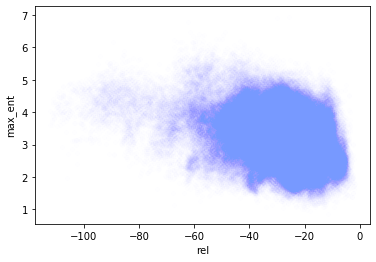

In [13]:
ax1 = ddff.plot.scatter(y='max_ent', x='rel', c='#7799FF01')
#ax2 = ddff.plot.scatter(y='ent_ent', x='rel', c='#7799FF01')

# Analysis

In [42]:
_un_file = '<...>/UNCERTAINTY_res/TEST_tpgn_tiny_uncertainty_trec_ranked.cutoff50'

scores = []
pattern = ".-. m"
prefix_len = len(pattern)
with open(_un_file, 'r') as f:  
        for line in f.readlines():
            if line[0:prefix_len] == pattern:
                scores.append(float(line.split(':')[1]))
len(scores)
                

50

In [44]:
np.mean(np.array(scores))

0.3545063963980498

In [46]:
# #TEST_tpgn_tiny_uncertainty_trec_ranked.cutoff50
_un_file_2 = '<...>/UNCERTAINTY_res/TEST_tpgn_tiny_uncertainty_trec_ranked_REL_ONLY.cutoff50'

scores2 = []
pattern = ".-. m"
prefix_len = len(pattern)
with open(_un_file_2, 'r') as f:
        #f.readline() # skip the header    
        for line in f.readlines():
            if line[0:prefix_len] == pattern:
                scores2.append(float(line.split(':')[1]))
len(scores2)

50

In [47]:
np.mean(np.array(scores2))

0.3452329506509577

In [54]:
stats.ttest_rel(scores, scores2)

Ttest_relResult(statistic=11.445440385877896, pvalue=1.8890181779987396e-15)